# Brightness metric idea notebook
### Written by Martin Harder Bruun

In [20]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy


image = imread('Images/astronaut.png')

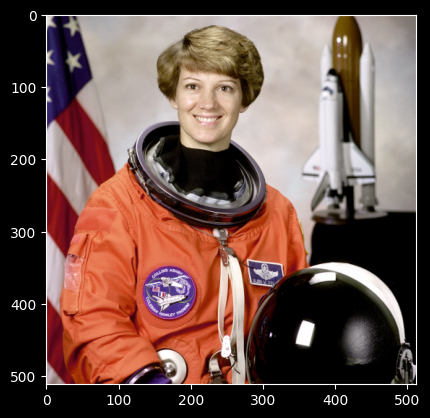

In [2]:
imshow(image)

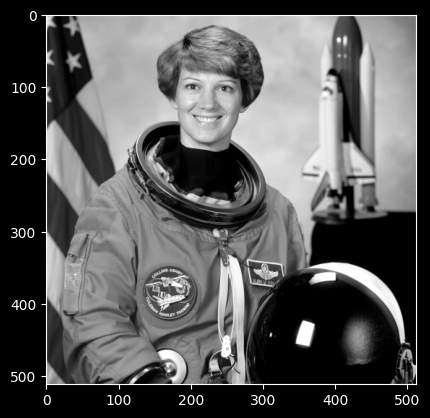

In [3]:
# Convert to grayscale 
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imshow(gray_image, cmap='gray')

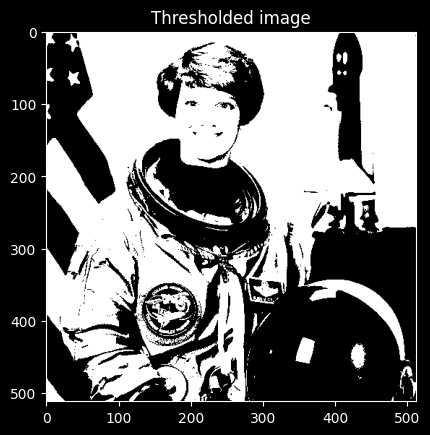

In [4]:
# Compute average intensity of each pixel:
avg = gray_image.mean()
# Create thresholded picture. To take either 0 or 255 in pixel value.
imbw = gray_image>avg# threshold the image
imbw = img_as_ubyte(imbw)
imshow(imbw, cmap='gray')
title('Thresholded image')
show()

## Thresholded image brightness metric
It is possible to treat this binary image as a form of extracted version of which pixels are above the mean in brightness and which are not therefore we can try to calculate the following:

Here we assume that $p_{ij}$ is the pixel value at index i,j.

$$
    BP = \sum^N_{i=0} \sum^M_{j=0} b(i,j)
$$
Where we have such that:
$$
b(i,j) =
\begin{cases}
    1 \text{ if } p_{ij} = 255 \\
    0 \text{ if } p_{ij} = 0
    \end{cases}
$$

And for DP or dim pixels we have such that:
$$
    DP = \sum^N_{i=0} \sum^M_{j=0} d(i,j)
$$
Where 
$$
d(i,j) =
\begin{cases}
    1 \text{ if } p_{ij} = 0 \\
    0 \text{ if } p_{ij} = 255
    \end{cases}
$$

This gives us the total amount of binary pixels above average in gray scale, where we can the calculate the percentages of image begin a "dim" or "bright" pixel. Or calculate the ratio $p_r$ as:

$$
p_r = \frac{BP}{DP} 
$$

In [5]:
# Calculate ratio of white pixels vs black pixels in scene:
brightPixCounter = 0
dimPixCounter = 0
imbw_flt = copy(imbw)
imbw_flt.flatten()

for i in imbw_flt:
    for j in i:
        if j == 255:
            brightPixCounter += 1
        else:
            dimPixCounter += 1
        
        
print("Number of Bright pixels: ",brightPixCounter)
print("Number of Dim Pixels: ",dimPixCounter)
print("Total number of pixels in image: ", imbw.size)
print("Percentage of Bright Pixels: ", brightPixCounter/imbw.size * 100)
print("Percentage of Dim Pixels: ", dimPixCounter/imbw.size * 100)
print("Pixel ratio is: ", brightPixCounter/dimPixCounter)

Number of Bright pixels:  147939
Number of Dim Pixels:  114205
Total number of pixels in image:  262144
Percentage of Bright Pixels:  56.43424987792969
Percentage of Dim Pixels:  43.56575012207031
Pixel ratio is:  1.2953811129109933


### Test on EuRoC

In [8]:
import BP_ratio as bp
EuRoC_metrics = bp.load_euroc_dataset()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000


In [17]:
data_br, data_m = EuRoC_metrics
import scipy.stats as st


In [28]:
q25, q75 = np.percentile(data_br[0], [25, 75])
bin_width = 2 * (q75 - q25) * len(data_br[0]) ** (-1/3)
bins = round((max(data_br[0]) - min(data_br[0])) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 38


In [29]:
q25, q75 = np.percentile(data_br[1], [25, 75])
bin_width = 2 * (q75 - q25) * len(data_br[1]) ** (-1/3)
bins = round((max(data_br[1]) - min(data_br[1])) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 31


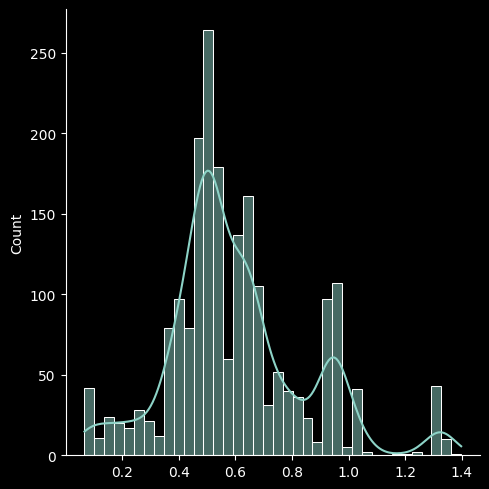

In [31]:
# Plot using seaborn
sns.displot(data_br[0], bins=38, kde=True)

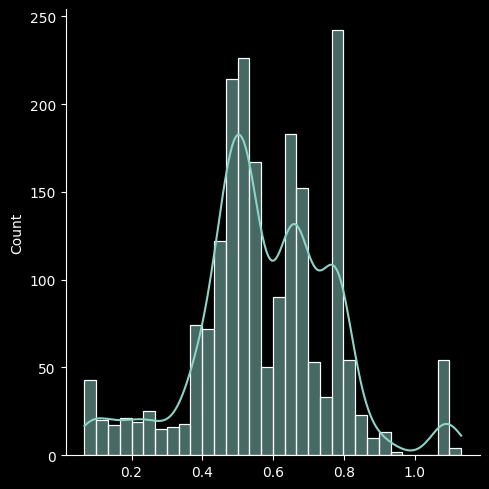

In [32]:
sns.displot(data_br[1], bins=32, kde=True)